In [13]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB

In [2]:
# 1) Load data, display column names and dataset size
# Load the dataset
df = pd.read_csv('/content/ad_click_dataset.csv')

# Display column names and dataset size
print("Column Names:", df.columns)
print("Dataset Size:", df.shape)

Column Names: Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')
Dataset Size: (10000, 9)


In [3]:
# 2) Work out the gaps (if possible, fill them in or delete them)
# Check for missing values
print("Missing Values:", df.isnull().sum())

# Fill missing values (numerical) with mean, categorical with mode
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[num_cols] = imputer_num.fit_transform(df[num_cols])
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Confirm no more missing values
print("Missing Values After Imputation:", df.isnull().sum())
print(df)

Missing Values: id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64
Missing Values After Imputation: id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64
          id full_name        age      gender device_type ad_position  \
0      670.0   User670  22.000000      Female     Desktop         Top   
1     3044.0  User3044  40.197363        Male     Desktop         Top   
2     5912.0  User5912  41.000000  Non-Binary     Desktop        Side   
3     5418.0  User5418  34.000000        Male     Desktop      Bottom   
4     9452.0  User9452  39.000000  Non-Binary     Desktop      Bottom   
...      ...       ...        ...         ...         ...       

In [4]:
df = df.drop(columns=['id', 'full_name'], errors='ignore')
df = pd.get_dummies(df, columns=['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']).astype(int)
df

,age,click,gender_Female,gender_Male,gender_Non-Binary,device_type_Desktop,device_type_Mobile,device_type_Tablet,ad_position_Bottom,ad_position_Side,ad_position_Top,browsing_history_Education,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,22,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,40,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,41,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,34,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,39,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
9996,40,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
9997,40,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
9998,40,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [5]:
# 4) Normalize the data
X = df.drop(columns=['click'])
y = df['click']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

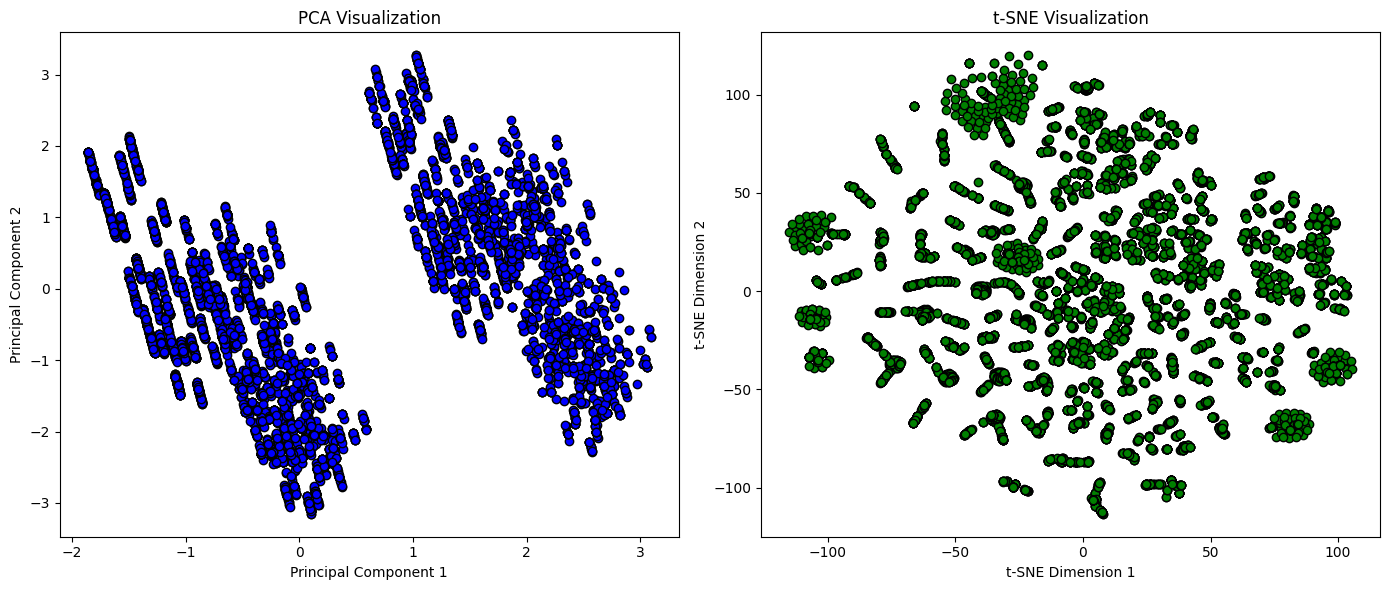

In [6]:
# Applying PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(X_scaled)

# Creating a figure to display both PCA and t-SNE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA plot
axes[0].scatter(df_pca[:, 0], df_pca[:, 1], c='blue', edgecolor='k')
axes[0].set_title('PCA Visualization')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# t-SNE plot
axes[1].scatter(df_tsne[:, 0], df_tsne[:, 1], c='green', edgecolor='k')
axes[1].set_title('t-SNE Visualization')
axes[1].set_xlabel('t-SNE Dimension 1')
axes[1].set_ylabel('t-SNE Dimension 2')

# Display the plots
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

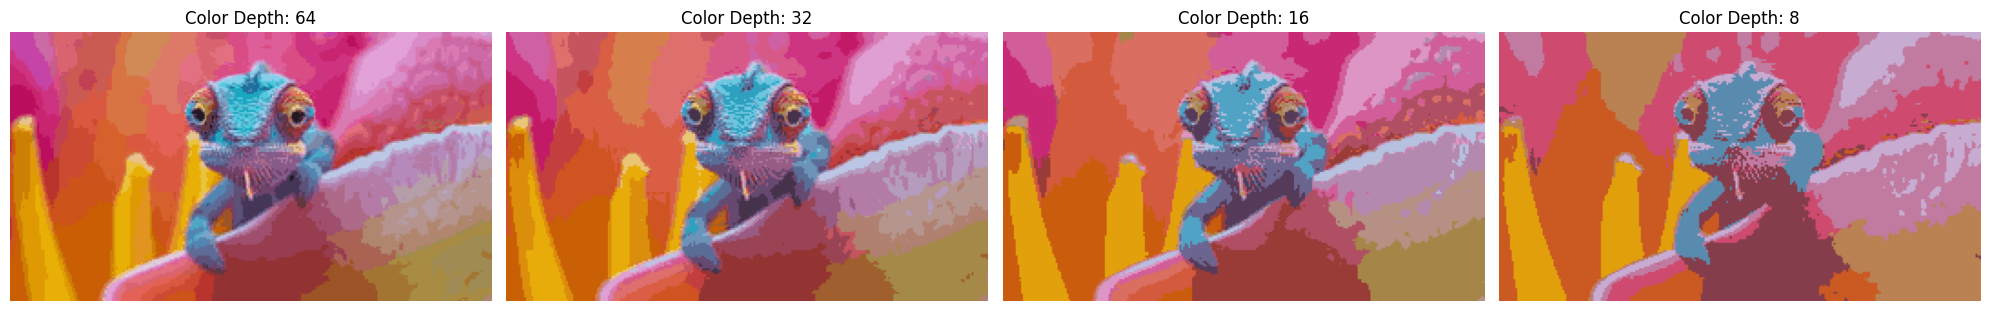

In [7]:
from sklearn.cluster import KMeans
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Load a sample image from skimage
image_url = '/content/download.jpeg'
image = io.imread(image_url)

# Reshape the image to a 2D array of pixels
image_2d = image.reshape(-1, 3)

# Function to apply KMeans and reconstruct the image with reduced color depth
def quantize_image(image_2d, n_colors):
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_2d)
    labels = kmeans.predict(image_2d)
    quantized_image = kmeans.cluster_centers_.astype('uint8')[labels]
    return quantized_image.reshape(image.shape)

# Apply KMeans for different color depths
color_depths = [64, 32, 16, 8]
quantized_images = [quantize_image(image_2d, depth) for depth in color_depths]

# Plotting the results
fig, axes = plt.subplots(1, len(color_depths), figsize=(20, 5))
for ax, img, depth in zip(axes, quantized_images, color_depths):
    ax.imshow(img)
    ax.set_title(f'Color Depth: {depth}')
    ax.axis('off')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


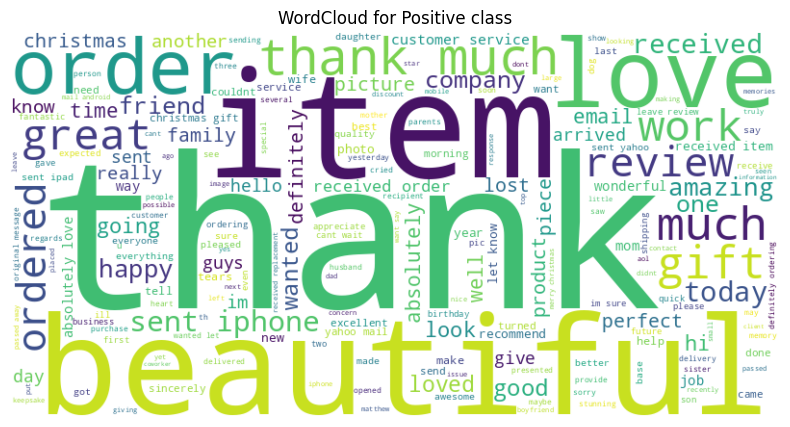

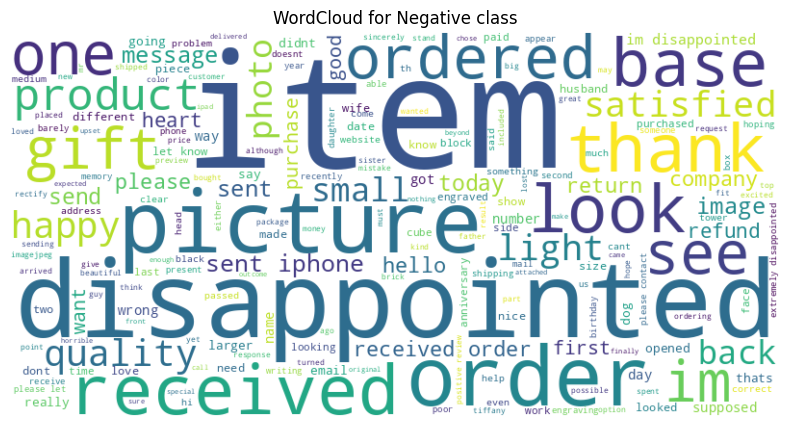

Accuracy: 84.31%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.81      1.00      0.90        35

    accuracy                           0.84        51
   macro avg       0.91      0.75      0.78        51
weighted avg       0.87      0.84      0.83        51

Confusion Matrix:
[[ 8  8]
 [ 0 35]]


In [14]:
# Download stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the data from CSV files
reviews = pd.read_csv('reviews.csv')
labels = pd.read_csv('labels.csv')
# Merge the two datasets based on 'id' column
data = pd.merge(reviews, labels, on='id')
data = data.drop(columns=['id'], errors='ignore')

# Data Cleaning Function
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Convert to lower case
    text = text.lower()

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Convert sentiment labels to binary
data['sentiment'] = data['sentiment'].map({'Positive': 1, 'Negative': 0})

# Split the data into features and target
X = data['cleaned_text']
y = data['sentiment']

# Visualize the most common words for each class using WordCloud
def plot_wordcloud(class_label):
    subset = data[data['sentiment'] == class_label]
    text = ' '.join(subset['cleaned_text'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {"Positive" if class_label == 1 else "Negative"} class')
    plt.show()

# Plot WordCloud for Positive and Negative classes
plot_wordcloud(1)  # Positive
plot_wordcloud(0)  # Negative

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
